In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [79]:
path = r'E:\Masters\Semester 4\Bearing fault detection\1st_test\1st_test'

In [80]:
filename = '2003.10.22.12.06.24'
dataset = pd.read_csv(os.path.join(path,filename),sep='\t',header = None)

In [81]:
dataset

,0,1,2,3,4,5,6,7
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066
...,...,...,...,...,...,...,...,...
20475,-0.022,-0.142,0.085,-0.078,-0.200,-0.198,-0.134,-0.093
20476,0.024,-0.156,0.042,-0.039,-0.159,-0.071,-0.227,-0.132
20477,-0.193,-0.303,-0.071,-0.125,-0.237,-0.251,-0.151,0.007
20478,-0.115,0.076,-0.078,-0.332,-0.027,-0.002,-0.151,-0.005


In [91]:
bearing_no = 2
bearing_data_1 = np.array(dataset.iloc[:,bearing_no-1])
#dara of first bearing
temp = bearing_data_1

In [92]:
np.min(temp)

-0.564

- Max Value
- Min Value
- Mean Value
- Std
- RMS
- Skewness
- Kurtosis
- Crest Factor
- Form factor

In [9]:
def compute_skewness(x):
    
    n = len(x)
    skewness = np.sum((x-np.mean(x))**3)/n
    s_3 = np.std(x,ddof = 1)**3
    return skewness/s_3

In [11]:
def compute_kurtosis(x):
    n = len(x)
    kurtosis = np.sum((x-np.mean(x))**4)/n
    s_4 = np.std(x,ddof = 1)**4
    return kurtosis/s_4 - 3

In [15]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp,ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp**2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [16]:
feature_matrix

array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669]])

In [19]:
df = pd.DataFrame(feature_matrix)
df.index = [filename[:-3]]

In [20]:
df

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307


In [106]:
test_set = 1

total_bearings = 8

Time_feature_matrix = pd.DataFrame()
path = r'E:\Masters\Semester 4\Bearing fault detection\1st_test\1st_test'
filename = '2003.10.22.12.06.24'
for i in range(0,total_bearings,2):
    Time_feature_matrix = pd.DataFrame()
    for filename in os.listdir(path):
        dataset=pd.read_csv(os.path.join(path,filename),sep='\t', header = None)

        bearing_data = np.array(dataset.iloc[:,i])

        feature_matrix = np.zeros((1,9))

        temp = bearing_data

        feature_matrix[0,0] = np.max(temp)
        feature_matrix[0,1] = np.min(temp)
        feature_matrix[0,2] = np.mean(temp)
        feature_matrix[0,3] = np.std(temp,ddof = 1)
        feature_matrix[0,4] = np.sqrt(np.mean(temp**2))
        feature_matrix[0,5] = compute_skewness(temp)
        feature_matrix[0,6] = compute_kurtosis(temp)
        feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
        feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

        df = pd.DataFrame(feature_matrix)
        df.index = [filename[:-3]]
        Time_feature_matrix = pd.concat([Time_feature_matrix,df])

    Time_feature_matrix.columns = ['Max','Min','Mean','std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
    Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index,format = '%Y.%m.%d.%H.%M') 
    if i == 0:
        Time_feature_matrix.to_csv(f'Time feature matrix for bearing no{1} of test set{test_set}.csv')
    elif i==2:
        Time_feature_matrix.to_csv(f'Time feature matrix for bearing no{2} of test set{test_set}.csv')
    elif i==4:
        Time_feature_matrix.to_csv(f'Time feature matrix for bearing no{3} of test set{test_set}.csv')
    elif i==6:
        Time_feature_matrix.to_csv(f'Time feature matrix for bearing no{4} of test set{test_set}.csv')

## Test set 2
- outer race failure bearing 1


In [194]:
df1 = pd.read_csv('Time feature matrix for bearing no1 of test set2.csv',index_col='Unnamed: 0')
df2 = pd.read_csv('Time feature matrix for bearing no2 of test set2.csv',index_col='Unnamed: 0')
df3 = pd.read_csv('Time feature matrix for bearing no3 of test set2.csv',index_col='Unnamed: 0')
df4 = pd.read_csv('Time feature matrix for bearing no4 of test set2.csv',index_col='Unnamed: 0')

In [195]:
df1.index = pd.to_datetime(df1.index)

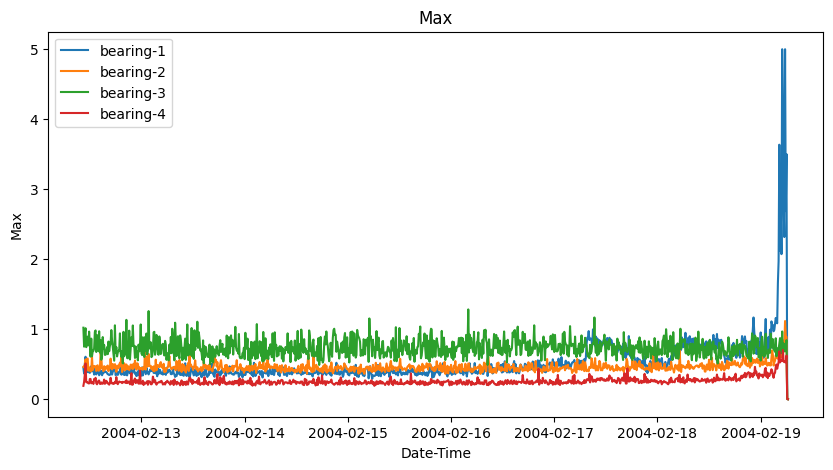

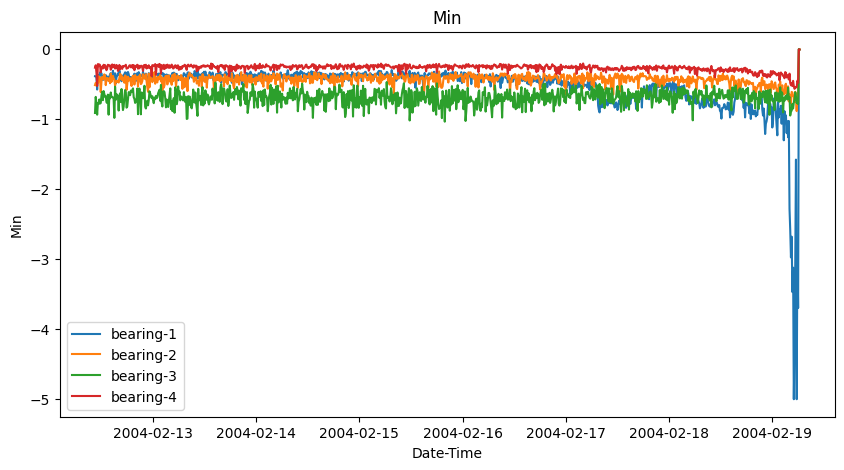

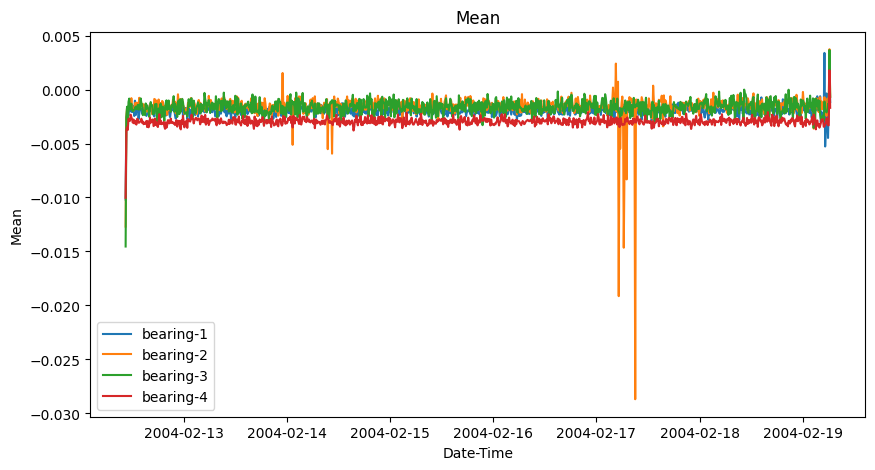

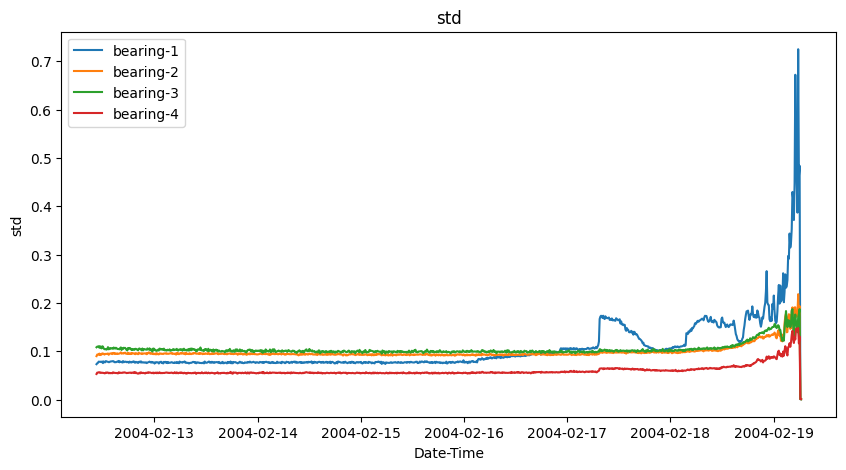

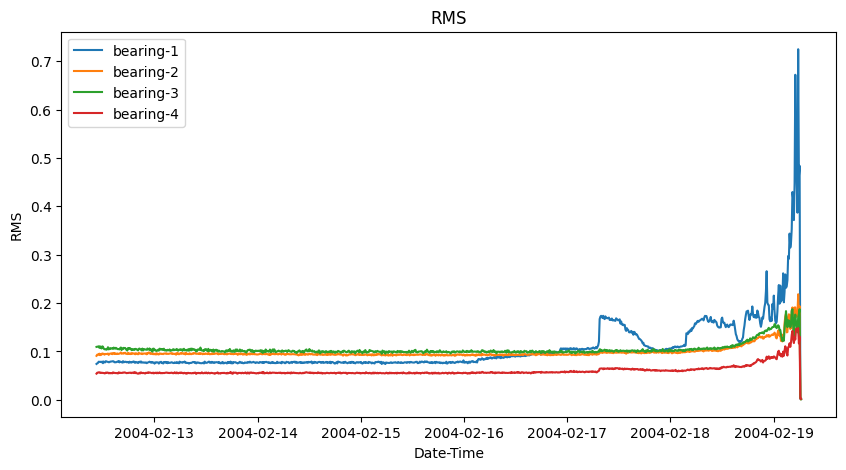

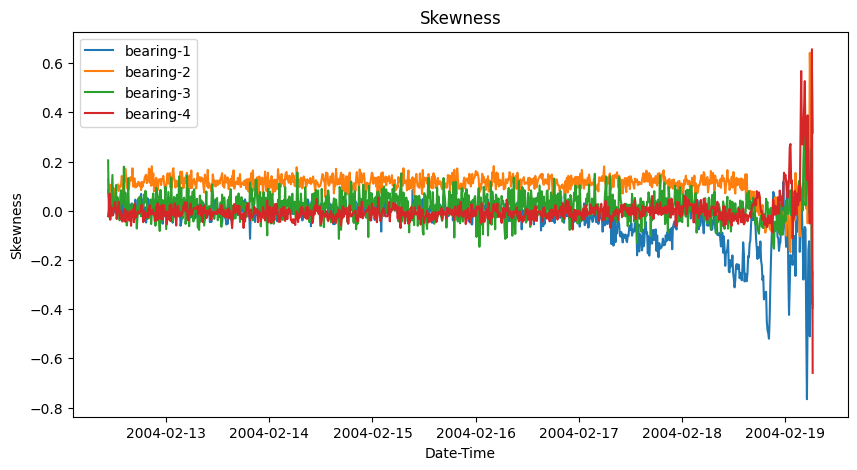

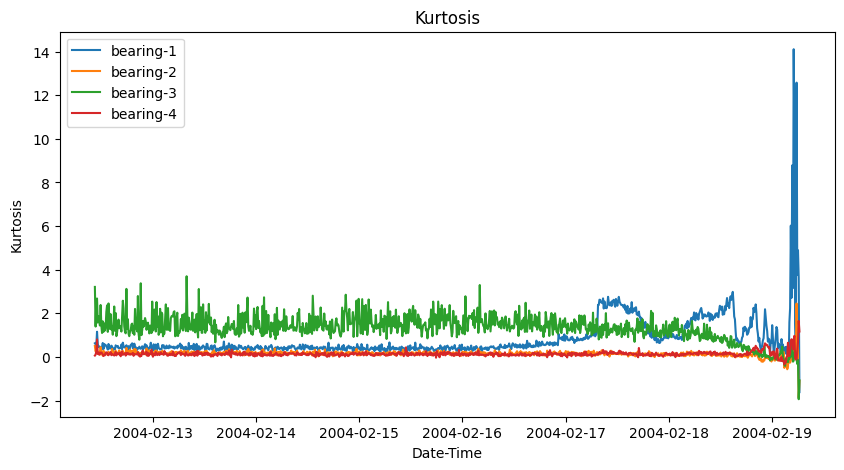

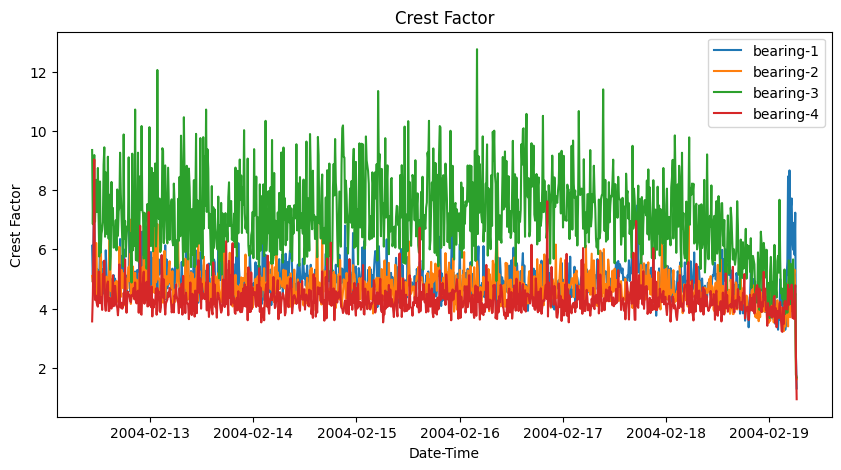

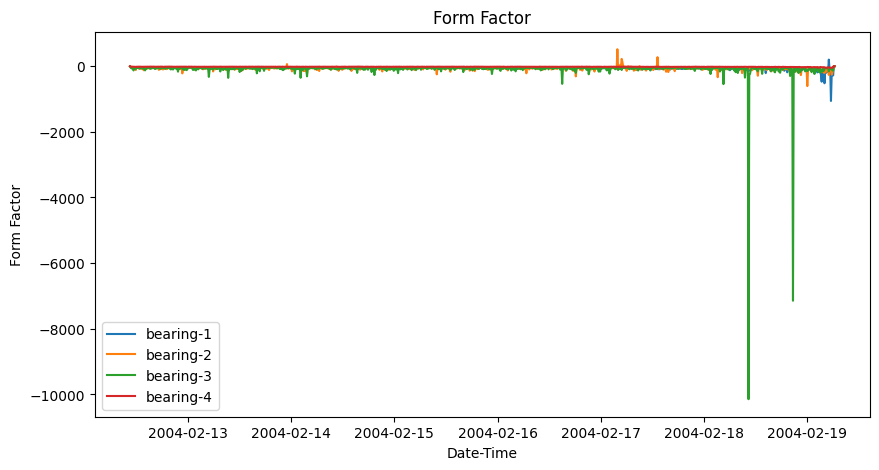

In [196]:
for col in df1.columns:
    plt.figure(figsize =(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])
    
    plt.xlabel('Date-Time')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [197]:
df_outer_race = df1.loc['2004-02-17 00:32:00':]
fault = []
for i in range(0,len(df_outer_race)):
    fault.append('Outer Race')
df_outer_race['Fault'] = fault
df_outer_race

C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\1793426328.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outer_race['Fault'] = fault


,Max,Min,Mean,std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-17 00:32:00,0.496,-0.461,-0.001632,0.104349,0.104360,-0.037080,0.781266,4.752800,-63.929273,Outer Race
2004-02-17 00:42:00,0.459,-0.505,-0.001872,0.106614,0.106628,-0.037403,0.767496,4.304691,-56.960165,Outer Race
2004-02-17 00:52:00,0.486,-0.483,-0.001659,0.106611,0.106622,-0.014484,0.765102,4.558168,-64.257958,Outer Race
2004-02-17 01:02:00,0.581,-0.635,-0.002352,0.104679,0.104703,-0.038783,0.786612,5.549046,-44.509943,Outer Race
2004-02-17 01:12:00,0.491,-0.466,-0.001825,0.104197,0.104210,0.030035,0.891259,4.711635,-57.098371,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419,Outer Race
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656,Outer Race
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983,Outer Race
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578,Outer Race


In [198]:
df_outer_race.to_csv('Outer race fault_test_2.csv',index =False)

## Test set 1
- inner race defect in bearing 3
- roller element defect in bearing 4



In [199]:
df1 = pd.read_csv('Time feature matrix for bearing no1 of test set1.csv',index_col='Unnamed: 0')
df2 = pd.read_csv('Time feature matrix for bearing no2 of test set1.csv',index_col='Unnamed: 0')
df3 = pd.read_csv('Time feature matrix for bearing no3 of test set1.csv',index_col='Unnamed: 0')
df4 = pd.read_csv('Time feature matrix for bearing no4 of test set1.csv',index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)

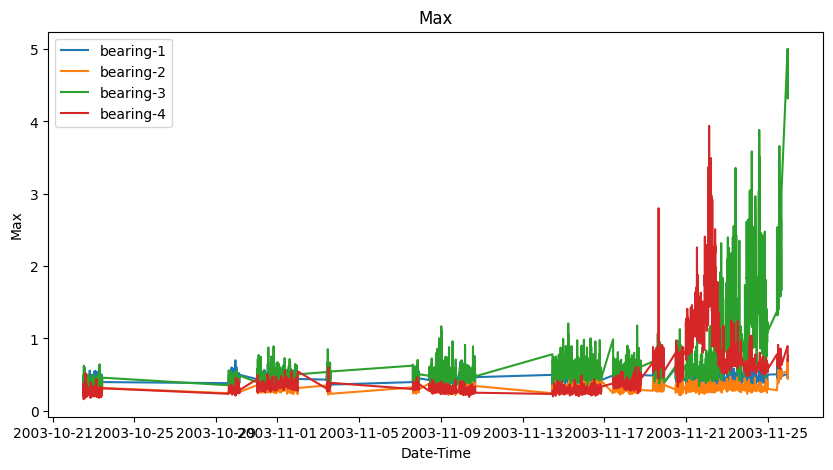

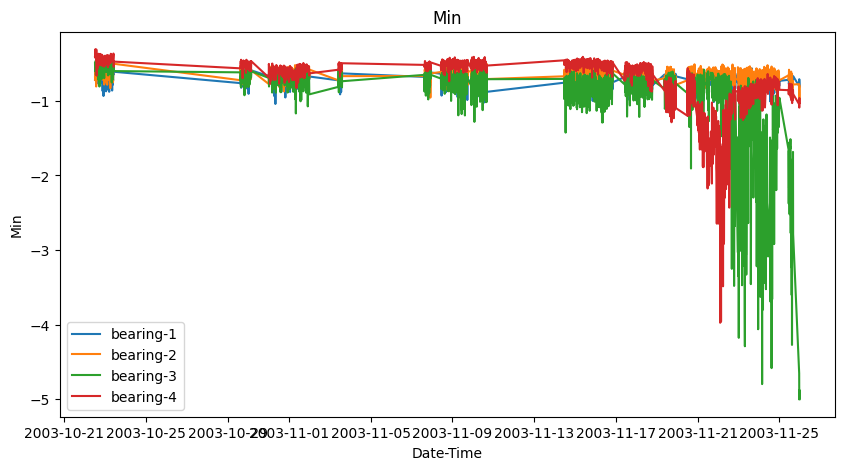

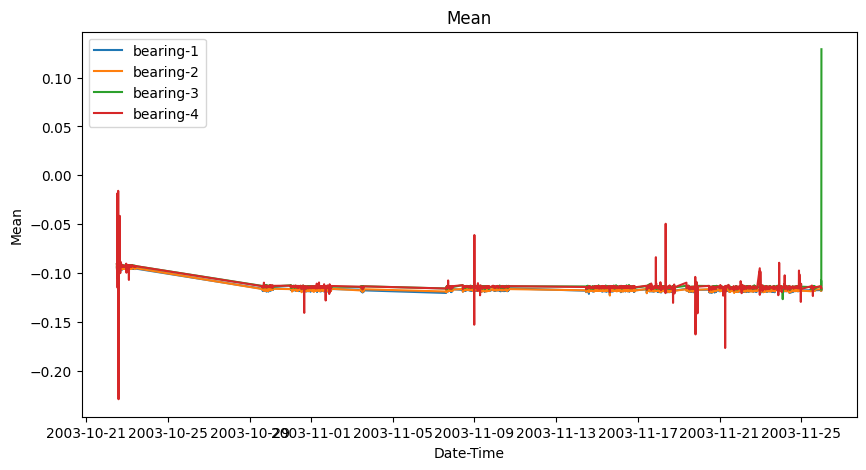

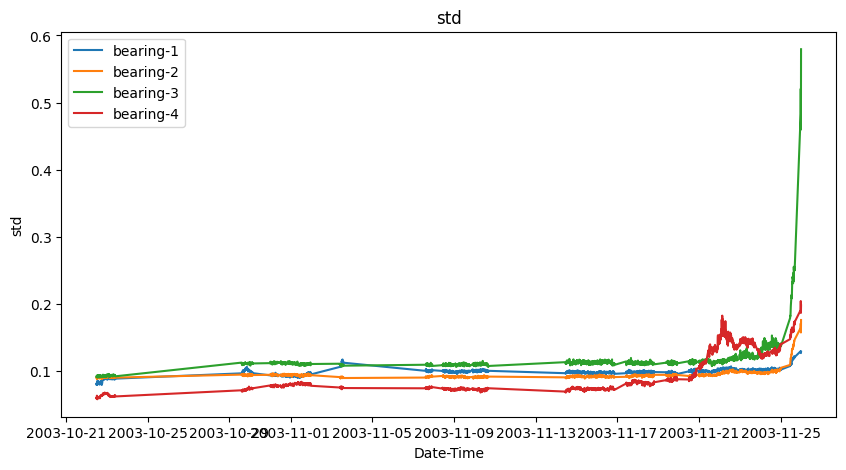

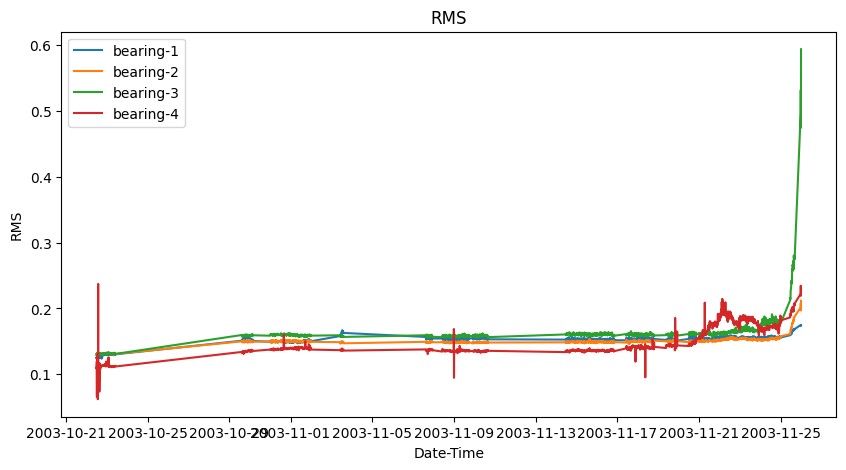

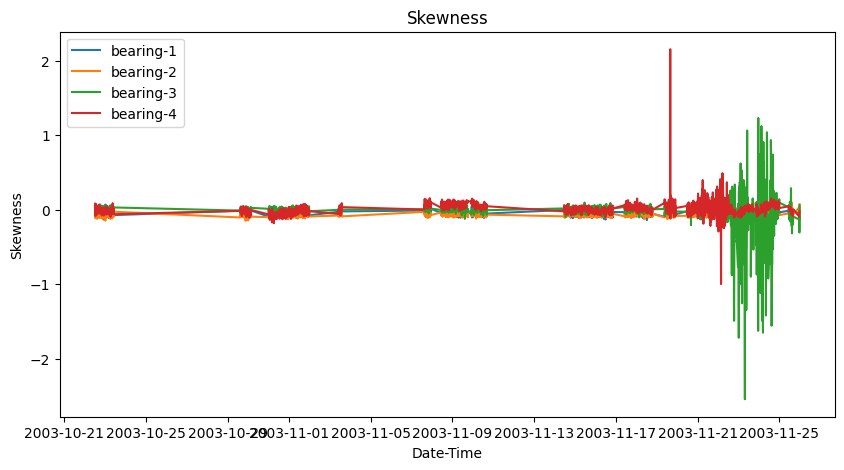

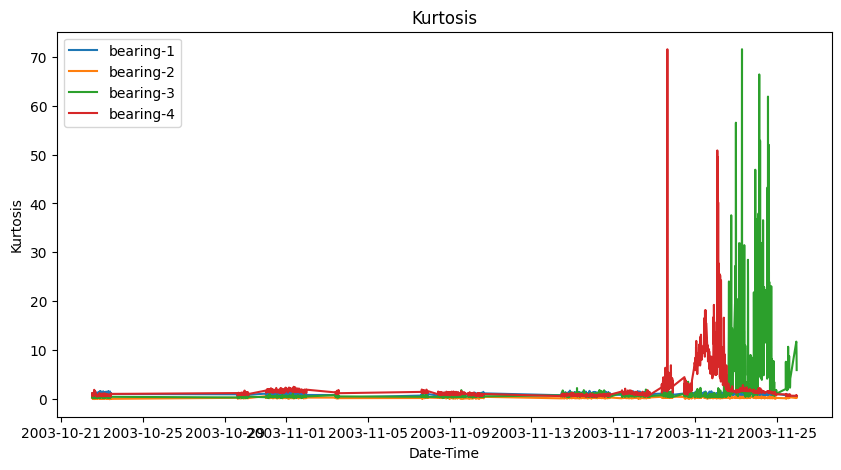

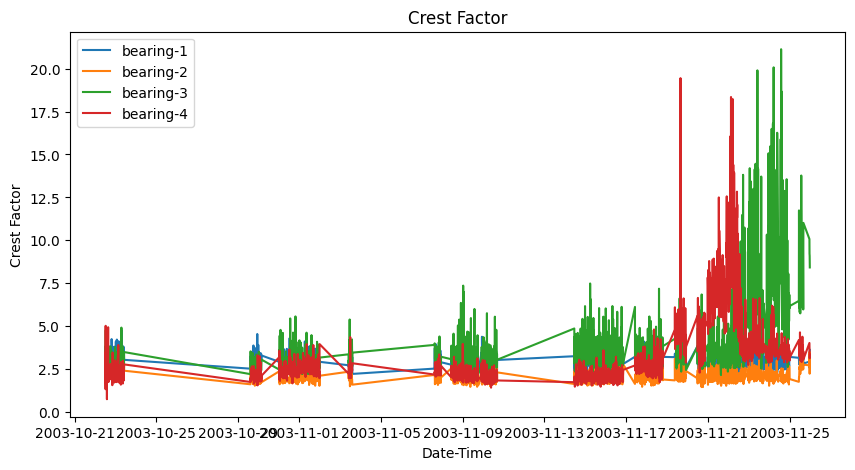

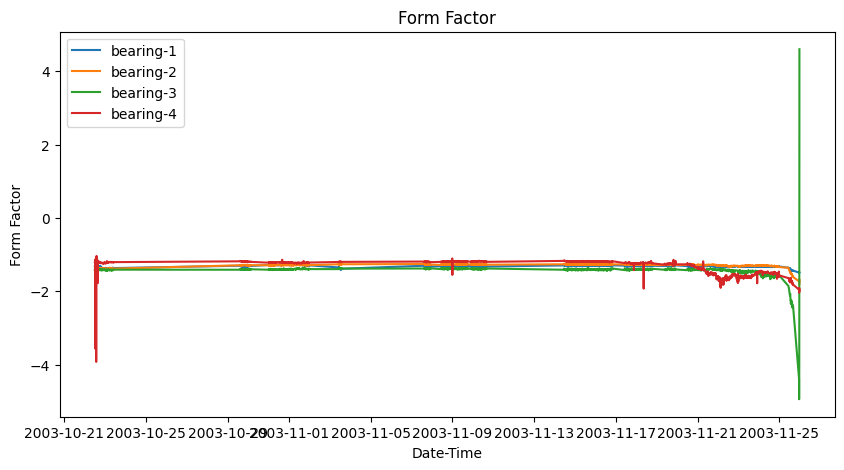

In [200]:
for col in df1.columns:
    plt.figure(figsize =(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])
    
    plt.xlabel('Date-Time')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

### inner race defect bearing 3

In [201]:
df_inner_race = df3.loc['2003-11-21 00:32:00':]

In [202]:
fault = []
for i in range(0,len(df_inner_race)):
    fault.append('Inner Race')
df_inner_race['Fault'] = fault
df_inner_race

C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\794790988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inner_race['Fault'] = fault


,Max,Min,Mean,std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,0.427,-0.957,-0.114388,0.113003,0.160790,0.002204,0.748889,2.655631,-1.405658,Inner Race
2003-11-21 00:44:00,0.630,-0.854,-0.114292,0.112194,0.160155,-0.017072,0.811215,3.933684,-1.401278,Inner Race
2003-11-21 00:54:00,0.645,-0.718,-0.114115,0.111576,0.159596,0.048754,0.529153,4.041466,-1.398555,Inner Race
2003-11-21 01:04:00,0.815,-0.728,-0.115024,0.110413,0.159439,0.060862,0.963834,5.111659,-1.386143,Inner Race
2003-11-21 01:14:00,0.474,-0.710,-0.115375,0.113216,0.161644,-0.018933,0.650481,2.932379,-1.401027,Inner Race
...,...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,3.037,-2.788,-0.115595,0.250242,0.275645,-0.089550,4.149899,11.017790,-2.384573,Inner Race
2003-11-25 23:13:00,4.998,-4.653,-0.113153,0.483111,0.496173,-0.129040,11.719977,10.073094,-4.384995,Inner Race
2003-11-25 23:19:00,4.902,-5.000,-0.107554,0.520587,0.531569,-0.083691,11.269354,9.221756,-4.942327,Inner Race
2003-11-25 23:29:00,4.316,-4.875,-0.117177,0.459761,0.474447,-0.303903,9.387377,9.096908,-4.048985,Inner Race


### Roller element

In [203]:
df_roller_element = df4.loc['2003-11-21 00:32:00':]
fault = []
for i in range(0,len(df_roller_element)):
    fault.append('Roller Element')
df_roller_element['Fault'] = fault
df_roller_element

C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\1904008893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roller_element['Fault'] = fault


,Max,Min,Mean,std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-21 00:34:00,1.282,-1.396,-0.115392,0.103224,0.154822,0.028321,8.422105,8.280452,-1.341707,Roller Element
2003-11-21 00:44:00,1.152,-1.108,-0.114562,0.107756,0.157274,0.103448,7.957752,7.324781,-1.372835,Roller Element
2003-11-21 00:54:00,0.972,-1.270,-0.112217,0.109194,0.156574,-0.088235,7.721262,6.207928,-1.395278,Roller Element
2003-11-21 01:04:00,0.945,-1.147,-0.113799,0.102681,0.153275,-0.001167,5.874304,6.165408,-1.346890,Roller Element
2003-11-21 01:14:00,1.096,-1.228,-0.114494,0.106910,0.156646,0.114157,6.682607,6.996648,-1.368164,Roller Element
...,...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.635,-0.908,-0.114403,0.173063,0.207455,0.008722,0.666151,3.060911,-1.813365,Roller Element
2003-11-25 23:13:00,0.894,-1.047,-0.113575,0.191114,0.222311,-0.090705,0.635272,4.021397,-1.957385,Roller Element
2003-11-25 23:19:00,0.879,-1.091,-0.114999,0.204396,0.234522,-0.079681,0.798513,3.748049,-2.039343,Roller Element
2003-11-25 23:29:00,0.686,-0.962,-0.114991,0.186758,0.219317,-0.029892,0.581061,3.127898,-1.907249,Roller Element


In [204]:
df_roller_element.to_csv('Roller element fault_test_1.csv',index =False)
df_inner_race.to_csv('Inne race fault_test_1.csv',index =False)

## Test set 3
- outer race failure in bearing 3

In [205]:
df1 = pd.read_csv('Time feature matrix for bearing no1 of test set3.csv',index_col='Unnamed: 0')
df2 = pd.read_csv('Time feature matrix for bearing no2 of test set3.csv',index_col='Unnamed: 0')
df3 = pd.read_csv('Time feature matrix for bearing no3 of test set3.csv',index_col='Unnamed: 0')
df4 = pd.read_csv('Time feature matrix for bearing no4 of test set3.csv',index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)

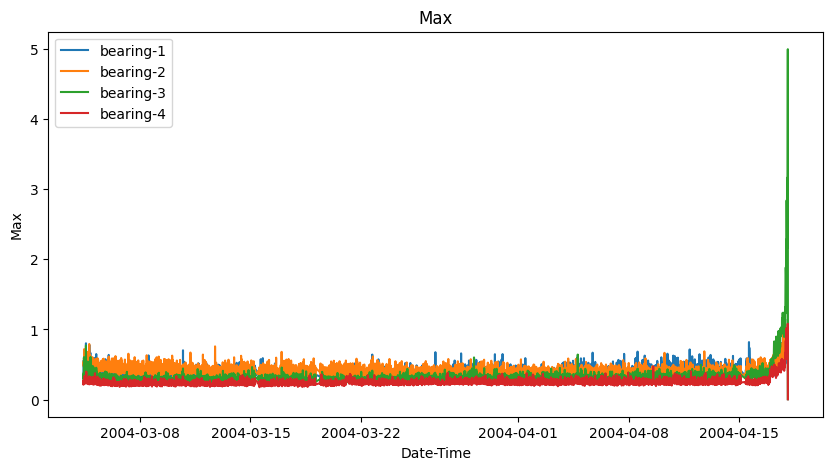

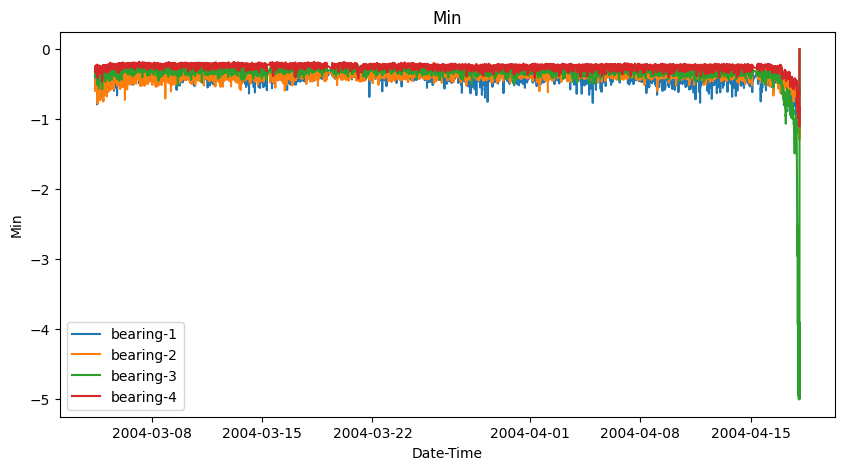

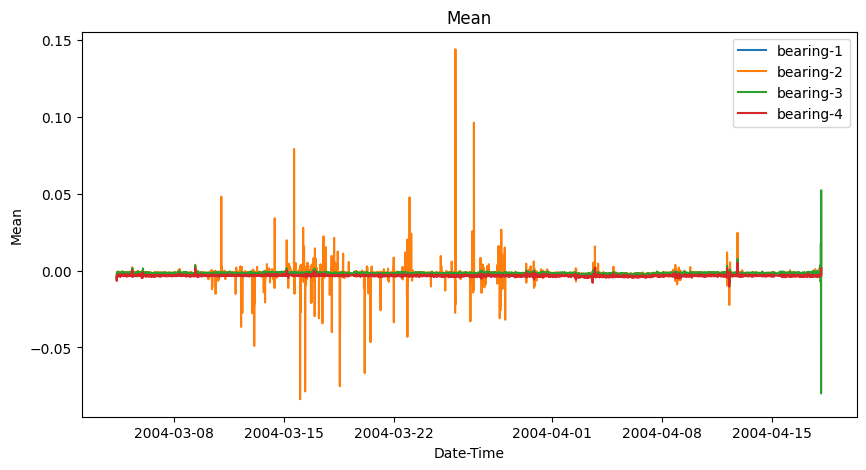

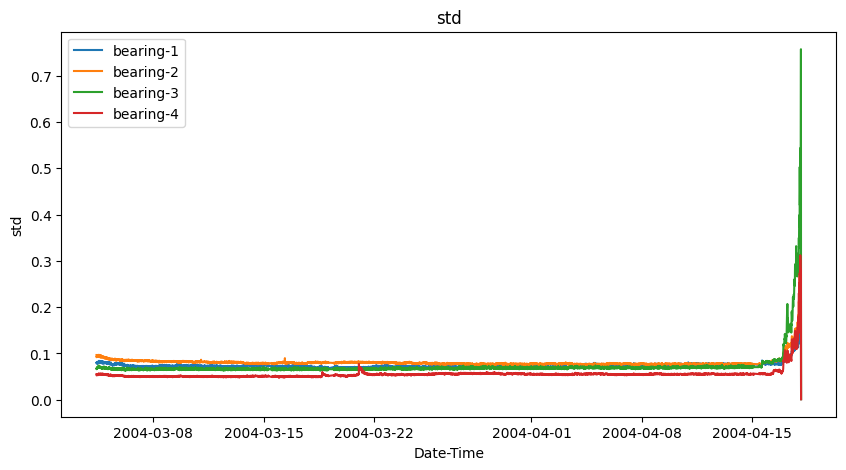

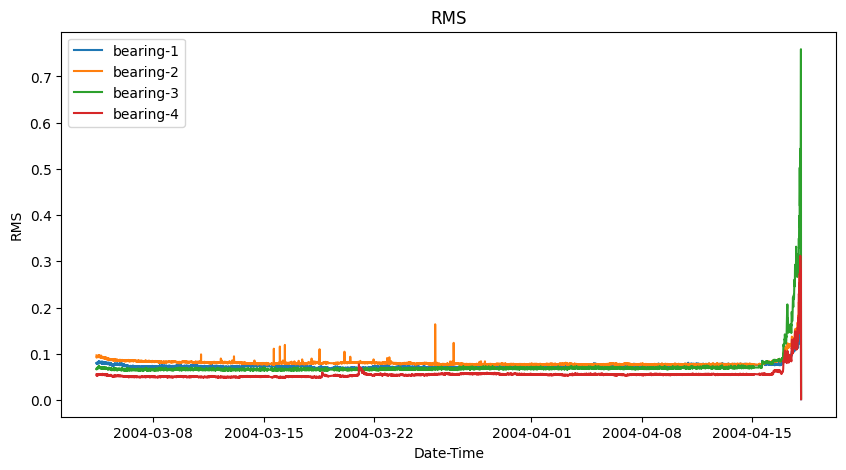

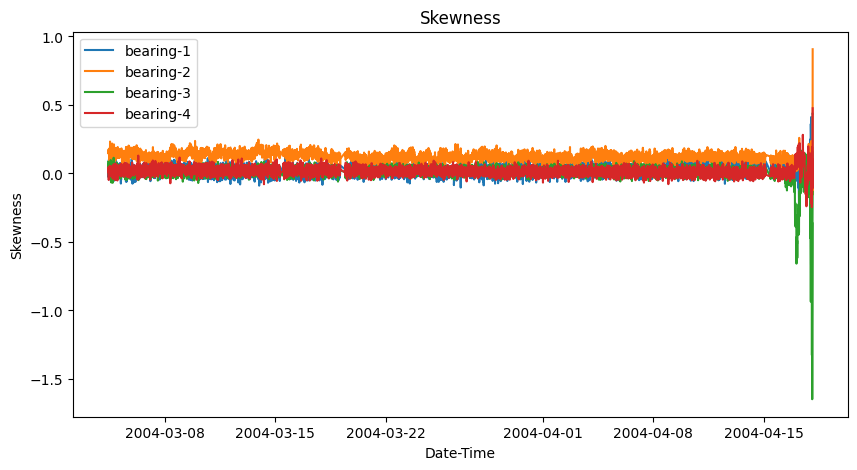

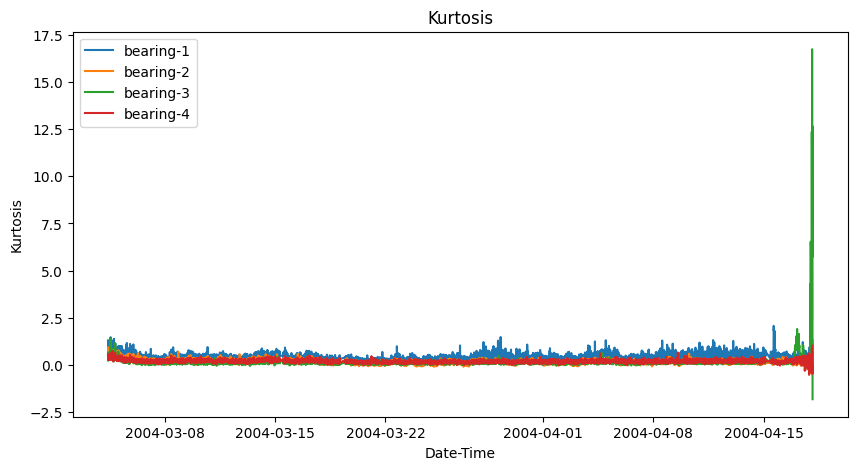

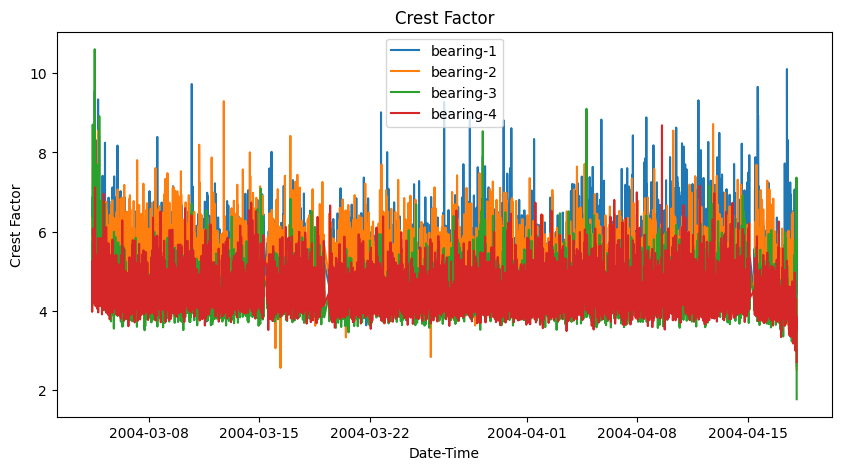

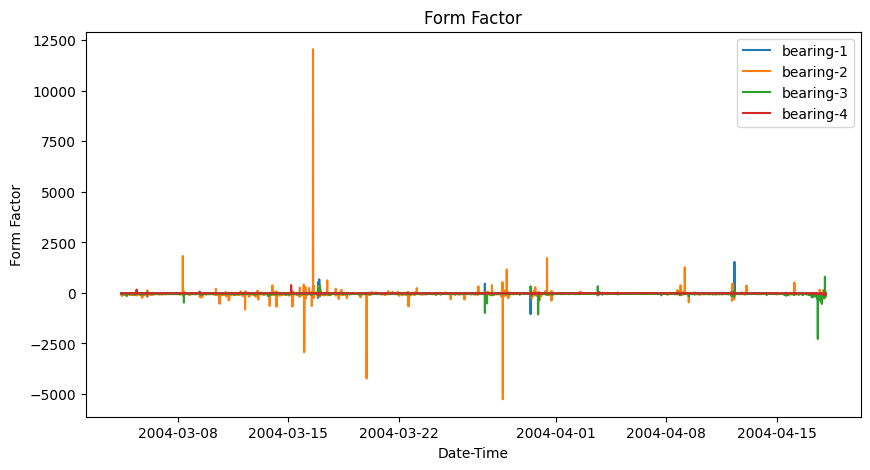

In [206]:
for col in df1.columns:
    plt.figure(figsize =(10,5))
    plt.plot(df1.index,df1[col])
    plt.plot(df1.index,df2[col])
    plt.plot(df1.index,df3[col])
    plt.plot(df1.index,df4[col])
    
    plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])
    
    plt.xlabel('Date-Time')
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [207]:
df_out_race = df4.loc['2004-04-15 00:32:00':]
fault = []
for i in range(0,len(df_out_race)):
    fault.append('Outer Race')
df_out_race['Fault'] = fault
df_out_race

C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\100129661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out_race['Fault'] = fault


,Max,Min,Mean,std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-04-15 00:41:00,0.251,-0.308,-0.003460,0.056085,0.056190,0.023377,0.201379,4.466968,-16.237845,Outer Race
2004-04-15 00:51:00,0.339,-0.312,-0.003227,0.055663,0.055755,-0.026806,0.407871,6.080177,-17.278939,Outer Race
2004-04-15 01:01:00,0.229,-0.266,-0.003579,0.055223,0.055337,0.042597,0.253666,4.138248,-15.459996,Outer Race
2004-04-15 01:11:00,0.247,-0.264,-0.003220,0.056147,0.056238,0.013670,0.237028,4.392080,-17.465780,Outer Race
2004-04-15 01:21:00,0.225,-0.281,-0.003217,0.055822,0.055913,-0.016999,0.137200,4.024096,-17.382686,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-04-18 02:02:00,0.867,-0.955,-0.003682,0.248059,0.248081,-0.026558,0.022271,3.494830,-67.379632,Outer Race
2004-04-18 02:12:00,0.918,-0.813,-0.003608,0.253635,0.253654,0.104431,-0.257887,3.619096,-70.304147,Outer Race
2004-04-18 02:22:00,1.082,-1.104,-0.003425,0.279849,0.279863,0.002889,0.030199,3.866172,-81.701455,Outer Race
2004-04-18 02:32:00,0.881,-0.969,-0.003452,0.282160,0.282174,-0.108601,-0.486148,3.122183,-81.743400,Outer Race


In [208]:
df_out_race.to_csv('Outer Race fault_test_3.csv',index =False)

## Collecting Normal bearing Data

In [158]:
Test=[1,2,3]
Bearing_No=[1,2,3,4]

df_normal_bearing = pd.DataFrame()

for test_no in Test:
    for bearing_no in Bearing_No:
        temp = pd.read_csv(f"Time feature matrix for bearing no{bearing_no} of test set{test_no}.csv",index_col='Unnamed: 0')

        starting = np.floor(len(temp)*.21)
        ending = np.floor(len(temp)*.23)

        start_time = temp.index[starting]
        end_time = temp.index[ending]

        temp = temp[start_time:end_time]
        
        df_normal_bearing=pd.concat([df_normal_bearing,temp])#df_normal_bearing.append(temp)

fault=[]
for i in range (0,len(df_normal_bearing)):
    fault.append('Normal')

df_normal_bearing['Fault']=fault

df_normal_bearing.to_csv('Normal_Bearing.csv',index=False)  

C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\958124033.py:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  start_time = temp.index[starting]
C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\958124033.py:14: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  end_time = temp.index[ending]
C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\958124033.py:13: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  start_time = temp.index[starting]
C:\Users\ianme\AppData\Local\Temp\ipykernel_22140\958124033.py:14: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  end_time = temp.index[ending]
C:\U

In [156]:
df_normal_bearing

,Max,Min,Mean,std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2003-11-01 14:01:00,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,Normal
2003-11-01 14:11:00,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2003-11-01 14:21:00,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2003-11-01 14:31:00,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
2003-11-01 14:41:00,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
...,...,...,...,...,...,...,...,...,...,...
2004-03-14 11:02:00,0.276,-0.244,-0.003381,0.051343,0.051453,0.050065,0.367385,5.364090,-15.216136,Normal
2004-03-14 11:12:00,0.244,-0.295,-0.002698,0.051048,0.051118,-0.017866,0.357546,4.773283,-18.945901,Normal
2004-03-14 11:22:00,0.234,-0.222,-0.003480,0.051675,0.051791,0.039894,0.298893,4.518154,-14.882157,Normal
2004-03-14 11:32:00,0.225,-0.212,-0.003334,0.052118,0.052223,0.005201,0.253224,4.308406,-15.661694,Normal


# -----------Dimensionality Reduction-----------------

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [210]:
df1 = pd.read_csv('Normal_Bearing.csv')
df2 = pd.read_csv('Inne race fault_test_1.csv')
df3 = pd.read_csv('Outer race fault_test_2.csv')
df4 = pd.read_csv('Outer Race fault_test_3.csv')
df5 = pd.read_csv('Roller element fault_test_1.csv')

In [211]:
df = pd.concat([df1,df2,df3,df4,df5])
df = df.reset_index(drop=True)

In [212]:
df

,Max,Min,Mean,std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,Normal
1,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
3,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
4,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
...,...,...,...,...,...,...,...,...,...,...
2562,0.635,-0.908,-0.114403,0.173063,0.207455,0.008722,0.666151,3.060911,-1.813365,Roller Element
2563,0.894,-1.047,-0.113575,0.191114,0.222311,-0.090705,0.635272,4.021397,-1.957385,Roller Element
2564,0.879,-1.091,-0.114999,0.204396,0.234522,-0.079681,0.798513,3.748049,-2.039343,Roller Element
2565,0.686,-0.962,-0.114991,0.186758,0.219317,-0.029892,0.581061,3.127898,-1.907249,Roller Element


In [213]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [214]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

principalDf['Fault']=np.array(df['Fault'])

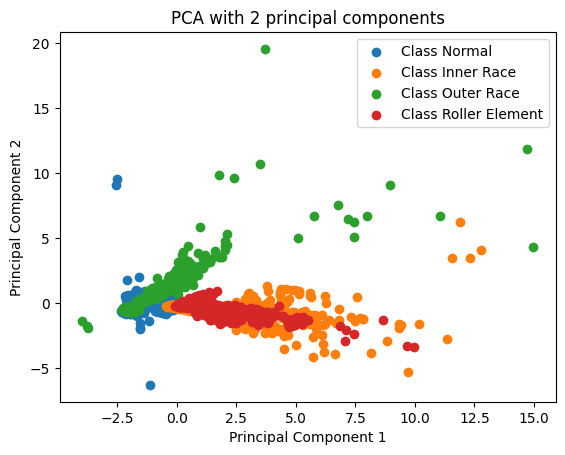

In [217]:
import matplotlib.pyplot as plt

# Assuming X_pca contains the two principal components (2D array)
# and y contains the label column with four classes

# Create a scatter plot for each class
for class_label in ('Normal', 'Inner Race', 'Outer Race', 'Roller Element'):
    # Filter the data points for the current class
    class_mask = (y == class_label)
    class_data = X_pca[class_mask]

    # Plot the data points with a unique color or marker for each class
    plt.scatter(class_data[:, 0], class_data[:, 1], label=f'Class {class_label}')

# Set plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 principal components')
plt.legend()

# Show the plot
plt.show()


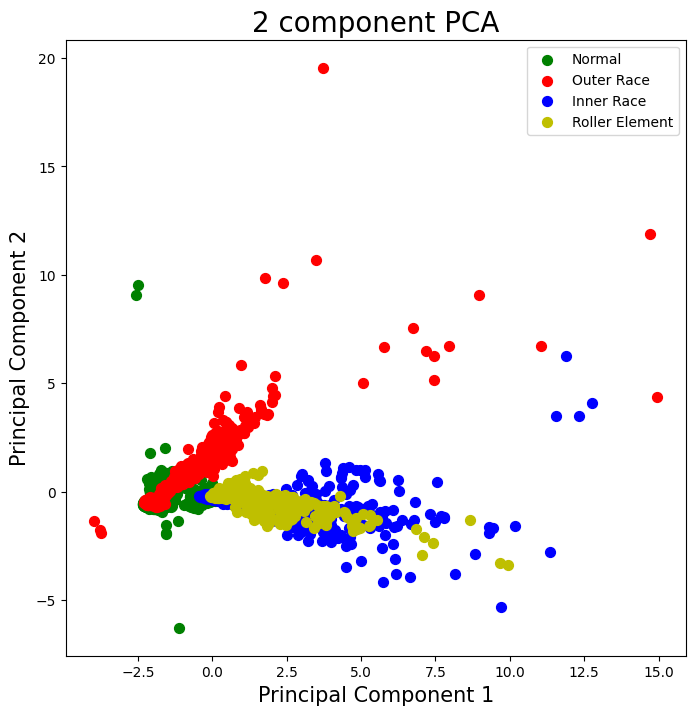

In [216]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

# PCA with 3 principal components

In [224]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3)
X_pca = pca_3.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(df['Fault'])

In [225]:
principalDf

,principal component 1,principal component 2,principal component 3,Fault
0,-0.487298,-0.444098,-1.541350,Normal
1,-0.407076,-0.442553,-1.515951,Normal
2,-0.432580,-0.545228,-1.367508,Normal
3,-0.428708,-0.332299,-1.671826,Normal
4,-0.275577,-0.499867,-1.360153,Normal
...,...,...,...,...
2562,0.807588,0.522015,-1.933457,Roller Element
2563,1.521682,0.740569,-1.785219,Roller Element
2564,1.680019,0.924322,-1.969959,Roller Element
2565,1.090638,0.728531,-2.037736,Roller Element


<IPython.core.display.Javascript object>


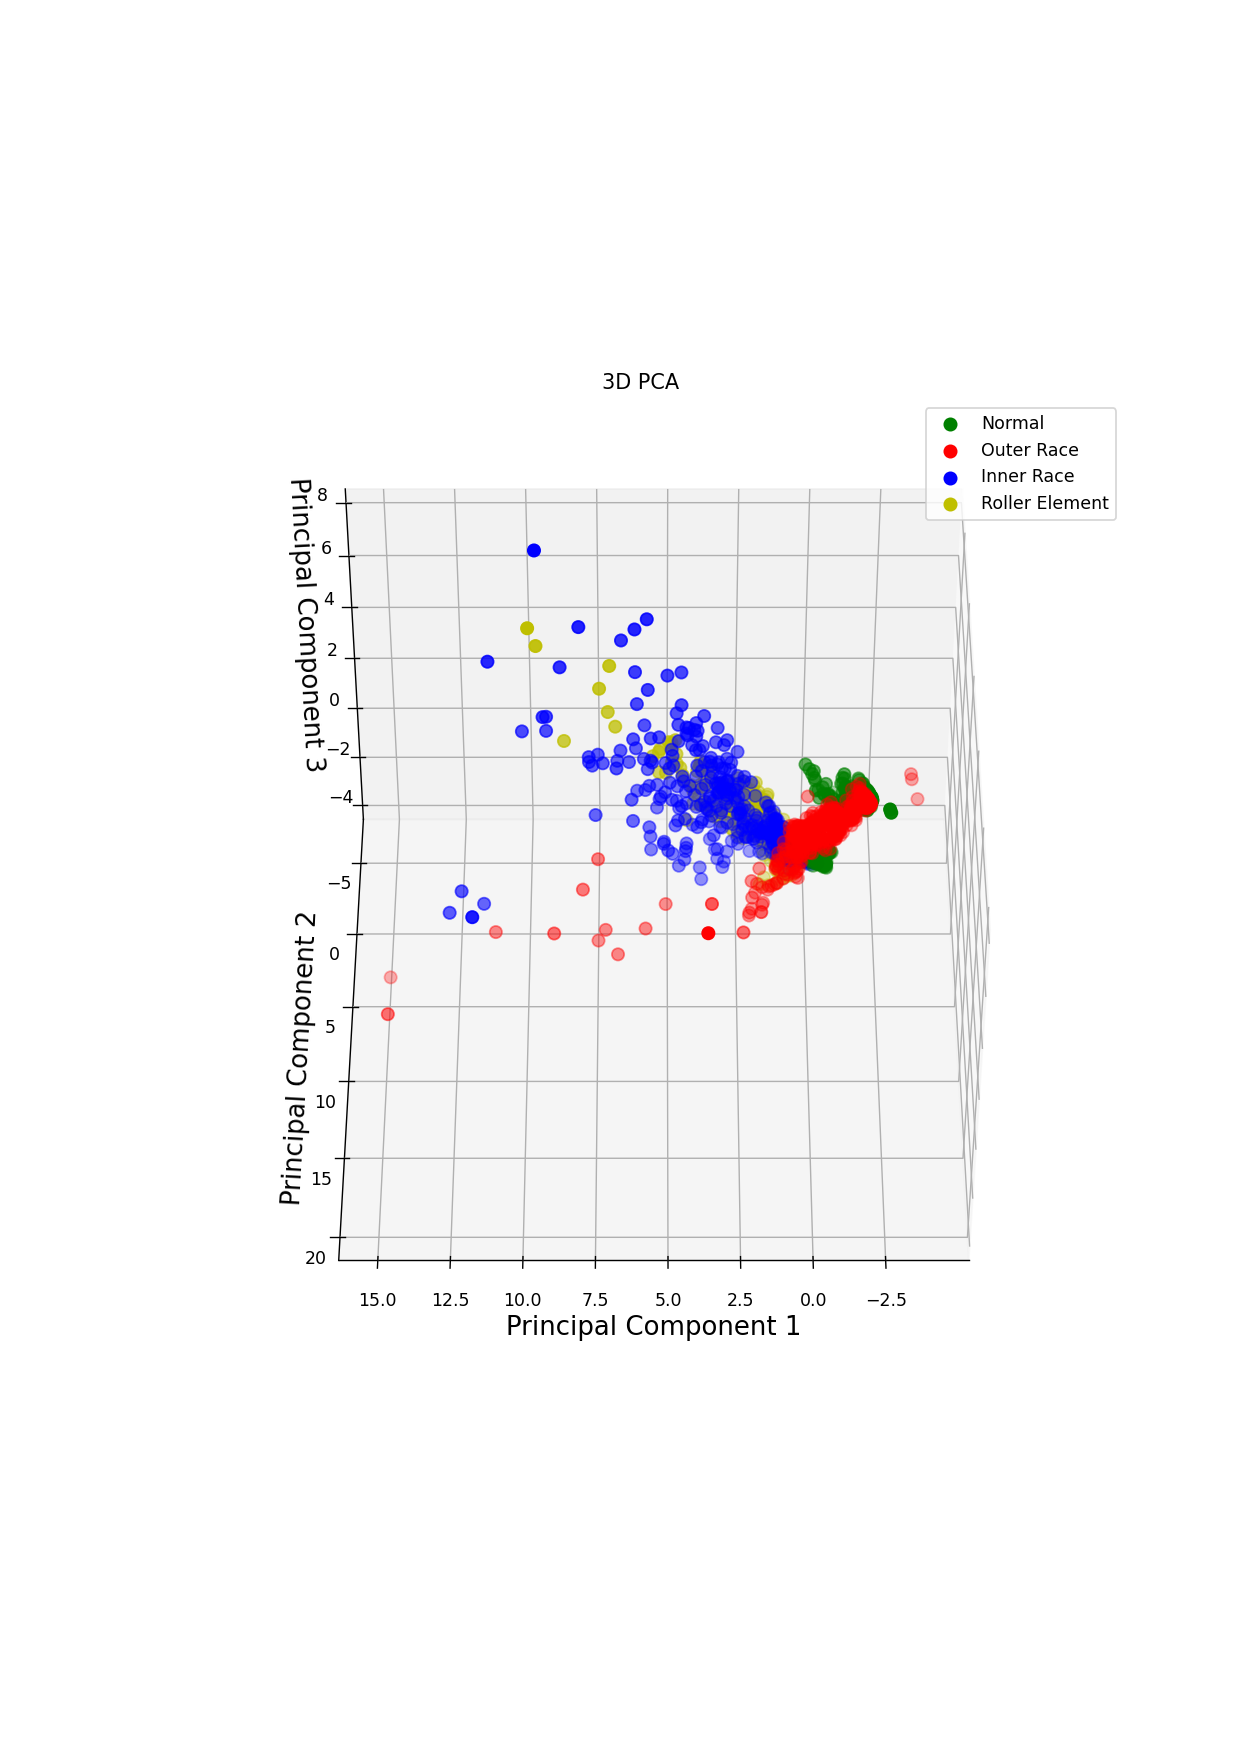

In [226]:
%matplotlib notebook
fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()

In [227]:
np.sum(pca_3.explained_variance_ratio_)

0.8121042361368747

# Machine learning


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

In [12]:
df1 = pd.read_csv('Normal_Bearing.csv')
df2 = pd.read_csv('Inne race fault_test_1.csv')
df3 = pd.read_csv('Outer race fault_test_2.csv')
df4 = pd.read_csv('Outer Race fault_test_3.csv')
df5 = pd.read_csv('Roller element fault_test_1.csv')

In [13]:
df = pd.concat([df1,df2,df3,df4,df5])
df = df.reset_index(drop = True)


In [14]:
df

,Max,Min,Mean,std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.398,-0.625,-0.117085,0.093069,0.149567,-0.012753,0.931376,2.661008,-1.277421,Normal
1,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
2,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
3,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
4,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
...,...,...,...,...,...,...,...,...,...,...
2562,0.635,-0.908,-0.114403,0.173063,0.207455,0.008722,0.666151,3.060911,-1.813365,Roller Element
2563,0.894,-1.047,-0.113575,0.191114,0.222311,-0.090705,0.635272,4.021397,-1.957385,Roller Element
2564,0.879,-1.091,-0.114999,0.204396,0.234522,-0.079681,0.798513,3.748049,-2.039343,Roller Element
2565,0.686,-0.962,-0.114991,0.186758,0.219317,-0.029892,0.581061,3.127898,-1.907249,Roller Element


In [16]:
df['Fault'].unique()

array(['Normal', 'Inner Race', 'Outer Race', 'Roller Element'],
      dtype=object)

In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Random_Forest_Model = RandomForestClassifier().fit(X_train, y_train)

In [21]:
y_pred = Random_Forest_Model.predict(X_test)

In [35]:
Confusion_Matrix = confusion_matrix(y_test,y_pred,labels = ['Normal', 'Inner Race', 'Outer Race', 'Roller Element'],normalize = 'true')

<AxesSubplot:>

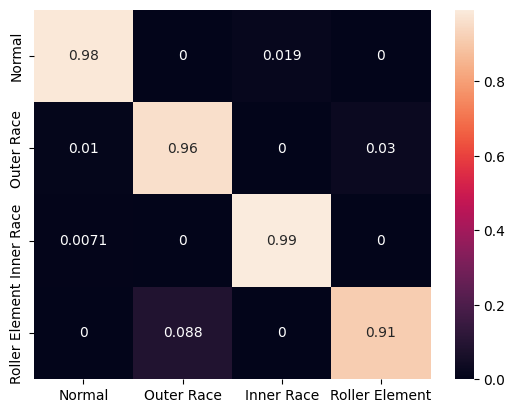

In [36]:
labels=['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colormap=sns.color_palette('Reds')
sns.heatmap(Confusion_Matrix,annot=True,xticklabels=labels, yticklabels=labels)